**Chapter: 3**

# **Distributions**
___
In statistics **distributions** is a set of possible outcomes and their corresponding probabilities. For example, if you toss a coin, there are two possible outcomes with approximately equal probability. For a six-sided die, the probability is $\frac {1}{6} $
To represent distributions, we'll use a library called ``empiricaldist``.
An "empirical" distribution is based on data, as opposed to a theoretical distribution. This library will be used throughout this book. So, BELIEVE IT! (I'm sorry I'm quoting Naruto)

# **Probability Mass Fuctions**
___
If the outcomes in a distribution are discrete (individually separate and distinct), we can describe the distribution with a **Probability mass function**, or $\text {PMF} $, which is a function that maps from each possible outcome to it's probability.
``empiricaldist`` provides a class called Pmf that represents a probability mass function. To use Pmf you can import it like this:

In [136]:
try:
  from  empiricaldist import Pmf
except:
  !pip install empiricaldist

In [137]:
from  empiricaldist import Pmf

The following example makes a Pmf that represents the outcome of a coin toss:

In [138]:
coin=Pmf()
coin['heads']=1/2
coin['tails']=1/2
coin

,probs
heads,0.5
tails,0.5


You can also make Pmf from a sequence of possible outcomes.
The following example uses `Pmf.from_seq` to make Pmf that represents a 6-sided die.

In [139]:
die=Pmf.from_seq([1,2,3,4,5,6])
die

,probs
1,0.166667
2,0.166667
3,0.166667
4,0.166667
5,0.166667
6,0.166667


I the above example all possible outcomes in the sequence appear once, so they all have the same probability, 1/6.
More generally, outcomes can appear more than once, as in the following example:

In [140]:
letters=Pmf.from_seq(list('Mississippi'))
letters

,probs
M,0.090909
i,0.363636
p,0.181818
s,0.363636


In [141]:
letters['s']

0.36363636363636365

In [142]:
letters('s')

0.36363636363636365

In [143]:
letters('t')

0

* With parentheses, you can also provide a squence of quantities and get a sequence of probabilities:

In [144]:
die([1,4,7])

array([0.16666667, 0.16666667, 0.        ])

###**Remarks**
___
The quantities in a Pmf can be strings, numbers, or any other type that can be stored in the index of a pandas Series.

# **The cookie problem revisited**
___

Let's use `Pmf()` to solve the cookie problem we saw earlier from **Chapter 2**.
The problem statement is the same. So, I am not repeating it here.



In [145]:
prior = Pmf.from_seq(['Bowl 1','Bowl 2'])
prior

,probs
Bowl 1,0.5
Bowl 2,0.5


This distribution, which contains the prior probability is called - the **prior distribution**.

To update the distribution based on new data (the vanilla cookie), we multiply the priors by 'likelihoods'. The likehood of drawing vanilla cookie from **'Bowl 1'** is $\frac {3}{4}$ and the likelihood for **'Bowl 2'** is $\frac {1}{2}$ 

In [146]:
likelihood_vanilla=[3/4,1/2]
posterior =prior * likelihood_vanilla
posterior

,probs
Bowl 1,0.375
Bowl 2,0.250


As we know from before the outcome is 'unnormalized' posteriors; that is they don't add up to 1. To make them add up to 1, we can use `normalize`, which is a method provided by `Pmf`:

In [147]:
posterior.normalize() 

0.625

The return value from `normalize` is the total probability of the data, which is $\text {P(D)} = \frac {5}{8}$ 

In [148]:
posterior

,probs
Bowl 1,0.6
Bowl 2,0.4


* One benefit of the using of `Pmf` objects is that it is easy to do successive updates with more data.

    * For an example, supppose you put the first cookie back (so the contents of the bowls don't change) and draw again from the same bowl. If the second cookie is also vanilla, we can do a second update like this:

In [149]:
posterior *= likelihood_vanilla
posterior.normalize()
posterior

,probs
Bowl 1,0.692308
Bowl 2,0.307692


Now the posterior probability for 'Bowl 1' is almost 70%, But suppose we do the same thing again and get a chocolate cookie.
Here are the likehoods for the new data.

In [150]:
likelihood_chocolate=[1/4, 1/2]

In [151]:
posterior *=likelihood_chocolate
posterior.normalize()
posterior

,probs
Bowl 1,0.529412
Bowl 2,0.470588


Now the posterior probability of for Bowl1 is about 53%. After two vanilla cookies and one chocolate, the posterior probabilities are close to 50/50.

# **101 Bowls**
___

Next let's solve the cookie problem with 101 bowls:

*  Bowl 0 contains 0% vanilla cookies,
*  Bowl 1 contains 1% vanilla cookies,
*  Bowl 2 contains 2% vanilla cookies.

and so on, up to 

* Bowl 99 contains 99% vanilla cookies.
* Bowl 100 contains all vanilla coookies.
The rest are chocolate cookies, eg. Bowl 1 is all chocolate cookies.

Suppose we-  
* Choose a bowl at a random
* Choose a cookie at a random
and it turns out to be vanilla. What is the probability that the cookie came from Bowl $x$, for each value of $x$ ?

To solve this problem, we'll use `np.arange` to make an array that represents 101 hypotheses, numbered from 0 to 100:


In [152]:
import numpy as np
hypos=np.arange(101)
hypos

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100])

In [153]:
prior1 = Pmf(1,hypos) #the first parameter is prior probability and the second one is the sequence of quantities.
prior1.normalize()

101

In this example, the probabilities are all the same, so it gets "broadcast" across the hypotheses. Since, all hypotheses have the same prior probabilty, this distribution is` uniform`. \\
A `uniform distribution` looks like this for a 6-sided die:

<p align='center'><img src="https://i0.wp.com/statisticsbyjim.com/wp-content/uploads/2021/11/uniform_distribution_discrete.png?resize=576%2C384&ssl=1"></p>

if we plot our prior distribution it's going to look like this:


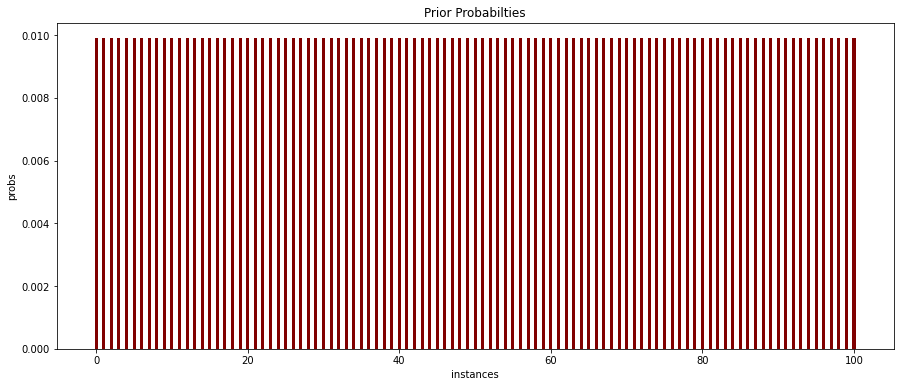

In [183]:
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
df=pd.DataFrame(columns=['probs'])
df['probs'] = prior1
plt.bar(df.index.values, df['probs'], color ='maroon',
        width = 0.4)
plt.title("Prior Probabilties")
plt.xlabel("instances")
plt.ylabel("probs")
plt.show()

The likehood of the data is the fraction of vanilla cookies in each bowl, which we can calculate using `hypos` :

In [155]:
likelihood_vanilla1 = hypos/100
likelihood_vanilla1[0:5]

array([0.  , 0.01, 0.02, 0.03, 0.04])

Now we can compute the posterior distribution in the usual way:

In [156]:
posterior1=prior1*likelihood_vanilla1
posterior1.normalize()
posterior1.head()

,probs
0,0.000000
1,0.000198
2,0.000396


The following figure shows the prior distribution and the posterior distribution after one vanilla cokie.

Text(0.5, 0, 'Bowl #')

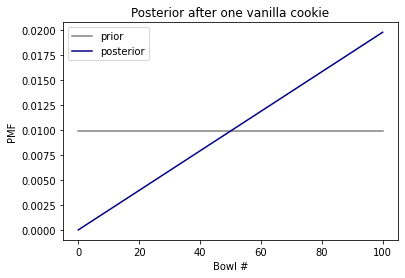

In [184]:
plt.plot(prior1,color='gray')
plt.plot(posterior1,color='navy')
plt.legend(['prior', 'posterior'])
plt.title("Posterior after one vanilla cookie")
plt.ylabel('PMF')
plt.xlabel("Bowl #")

Now suppose we put the cookie back, draw again from the same bowl and get another vanilla cookie. Here's the updata after the second cookie:

In [158]:
posterior2 = posterior1 * likelihood_vanilla1
posterior2.normalize()

0.6699999999999999

Text(0.5, 0, 'Bowl #')

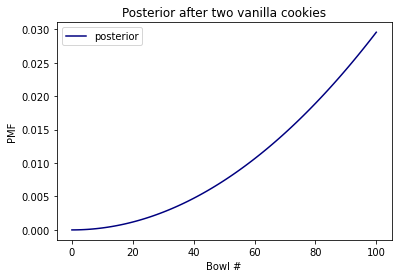

In [159]:
plt.plot(posterior2,color='navy')
plt.legend(['posterior'])
plt.title("Posterior after two vanilla cookies")
plt.ylabel('PMF')
plt.xlabel("Bowl #")

After two vanilla cookies, the high-numbered bowls have the highest posterior probabilities because they contain the most vanilla cookies; the low numbered bowls have the lowest probabilities. \\
\
But suppose we draw again and get a chocolate cookie. Here's the update

In [160]:
likelihood_chocolate1 = 1- hypos/100
posterior3 = posterior2 * likelihood_chocolate1
posterior3.normalize()

0.2462686567164179

And here's the posterior distribution:

Text(0.5, 0, 'Bowl #')

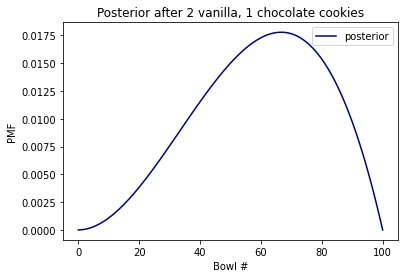

In [161]:
plt.plot(posterior3,color='navy')
plt.legend(['posterior'])
plt.title("Posterior after 2 vanilla, 1 chocolate cookies")
plt.ylabel('PMF')
plt.xlabel("Bowl #")

Now Bowl 100 has been eliminated because it contains no chocolate cookies. But the high numbered bowls are still more likely than the low numbered bowls, because we have seen more vanilla cookies than chocolate. 

Infact the peak of the distribution is at $67$, because the fraction of vanilla cookies in the data we've observed is $\frac {2}{3}$ (2 out of 3 draws were vanilla cookies). 
\begin{align}
100 × \frac {2}{3} ≈ 67
\end{align}

The quantity with highest posterior probability is called the $\text{MAP}$, which stands for "maximum a posteriori probability".

To compute the $\text{MAP}$ in code:

In [162]:
posterior3.idxmax()

67

Or $\text{PMF}$ provides more memorable syntax for the same thing:

In [163]:
posterior3.max_prob()

67

### **Remarks**
This example isn't really about bowls though, it's about estimating proportions of the contents within the bowls. Based on the draws, we infer what fraction between 0 to 1 of a content is present within the scattered hypotheses, rather than going around inspecting each and every one of them.

## **The Dice Problem**
___

Previously, we solved the Dice problem iwth Bayes Table.
Let's solve it using $\text{PMF}.$

In [164]:
hypos=[6,8,12] # sided dies

In [165]:
prior2 = Pmf(1/3,hypos) #the first parameter is prior probability and the second one is the sequence of quantities.
prior2

,probs
6,0.333333
8,0.333333
12,0.333333


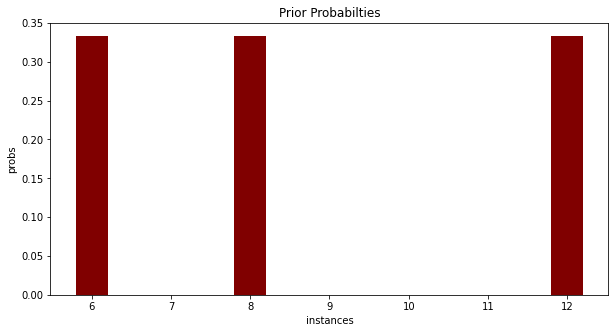

In [166]:
plt.figure(figsize=(10,5))
df1=pd.DataFrame(columns=['probs'])
df1['probs'] = prior2
plt.bar(df1.index.values, df1['probs'], color ='maroon',
        width = 0.4)
plt.title("Prior Probabilties")
plt.xlabel("instances")
plt.ylabel("probs")
plt.show()

As in the previous example, the prior probability gets broadcast across the hypotheses. The `Pmf` object has two attributes: \\
* `qs` contains the quantities in the distribution;
* `ps` contains the corresponding probabilities.

In [167]:
prior2.qs

array([ 6,  8, 12])

In [168]:
prior2.ps

array([0.33333333, 0.33333333, 0.33333333])

In [169]:
likelihood1=1/6,1/8,1/12

In [170]:
posterior_dp = prior2*likelihood1
posterior_dp.normalize()
posterior_dp

,probs
6,0.444444
8,0.333333
12,0.222222


The posterior probability for the 6-sided die is $\frac{4}{9}$ .

* Suppose I role the die agian, this time around the number comes out is $7$.
* If the number is $7$ per say, now our likelihood changes.

In [171]:
likelihood2 = 0, 1/8, 1/12

In [172]:
#Now to update according to our new likelihood
posterior_dp*=likelihood2
posterior_dp.normalize() #remember: everytime we update the Pmf, we have to normalize the data
posterior_dp

,probs
6,0.000000
8,0.692308
12,0.307692


After rolling a $1$ and a $7$, the posterior probability of the $8$ sided die rises up to 69%. 

###**Updating Dice**
___

The following function is a more general version of the update in the previous section:

In [179]:
def update_dice(pmf, data):
  """Update pmf based on new data."""
  hypos= pmf.qs
  likelihood = 1/hypos
  impossible = (data > hypos)
  likelihood[impossible] = 0
  pmf*=likelihood
  pmf.normalize()

The first parameter is a `Pmf` that represents the possible dice and their probabilities. The second Parameter is the outcome of rolling a die.

In [180]:
pmf=prior2.copy()
pmf

,probs
6,0.333333
8,0.333333
12,0.333333


In [181]:
update_dice(pmf,1)
pmf

,probs
6,0.444444
8,0.333333
12,0.222222


In [182]:
update_dice(pmf,7)
pmf

,probs
6,0.000000
8,0.692308
12,0.307692


###**Final** **Remarks**
___
This chapter introductes `empiricaldist` module, which provides Pmf, which we use to represent a set hypotheses and their probabilities. This is based on Pandas. We've seen how the distribution varies initializing as `uniform` then transforms as it updates.